## UN Linear Regression Practice

In [116]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [6]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


#### Q1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.
##### a. What coefficients do you get? Interpret the meaning of these coefficents.  
$\beta_0$ = -468 and $\beta_1$ = 0.26  
At year 0, life expectancy was negative (which is obviously nonsensical); every passing year results in life expectancy growing by 0.27 years.  
##### b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can use the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant? 
$\beta_0$ = 64.75 and $\beta_1$ = 0.26  
p-value = 1.342995239833837e-102
##### c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
##### d. Plot the actual values against your model's estimates for the mean life expectancy.  
##### e. Inspect the R-squared value for the model. does it make sense, given the plot?  
r-squared = 0.07154748843194658; model looked pretty close, so low r-squared seems weird

In [68]:
gdp_le.groupby('Year')['Life_Expectancy'].mean()#.plot()

Year
1990    64.745253
1991    65.021276
1992    65.217845
1993    65.218031
1994    65.339539
1995    65.956224
1996    66.200189
1997    66.437280
1998    66.556082
1999    66.916176
2000    67.154618
2001    67.445644
2002    67.653800
2003    67.907879
2004    68.194988
2005    68.511619
2006    68.866658
2007    69.199696
2008    69.578075
2009    69.990552
2010    70.363572
2011    70.756336
2012    71.086031
2013    71.221144
2014    71.490074
2015    71.725811
2016    72.049365
2017    72.280413
2018    72.493003
2019    72.726851
2020    72.044532
2021    71.520337
2022    72.154386
Name: Life_Expectancy, dtype: float64

In [24]:
lr_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
lr_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

In [118]:
lr_year_adjusted = smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
lr_year_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        21:57:14   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_df['mean_estimate'] = lr_year_adjusted.predict(pred_df)

pred_df.head(5)

,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728
2,1991.306122,64.978567
3,1991.959184,65.153406
4,1992.612245,65.328245


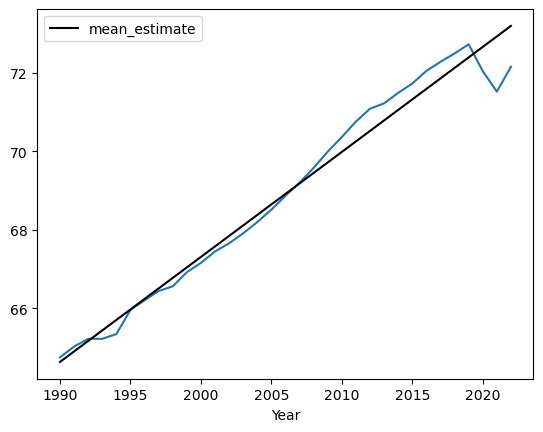

In [212]:
fig, ax = plt.subplots()
gdp_le.groupby('Year')['Life_Expectancy'].mean().plot()
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);

In [120]:
sms.jarque_bera(lr_year_adjusted.resid)

(469.13755422457075,
 1.342995239833837e-102,
 -0.7094491570127851,
 2.8200402423092434)

In [122]:
lr_year_adjusted.rsquared

0.07154748843194658

#### Q2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  ##### 
a. What coefficients do you get? Interpret the meaning of those coefficients  
$\beta_0$ = 65.949870 and $\beta_1$ = 0.000257  
At GDP per capita of 0, life expectancy was 66 years; every dollar increase results in a life expectancy increase of 0.000257.  .##### 
b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficient  
$\beta_0$ = 65.949870 and $\beta_1$ = 0.257s##### ?
c. Are the coefficients statistically significa 
p-value = 0.0017251845192994594n##### t?
d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,  
50K = 78.79487  
100K = 91.63987  
##### 00? e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [136]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [162]:
lr_gdp = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

In [164]:
lr_gdp = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita/1000)", data=gdp_le_2021).fit()
lr_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        23:21:06   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
sms.jarque_bera(lr_gdp.resid)

(12.72484253301924,
 0.0017251845192994594,
 -0.6637725985434978,
 2.9459646075602675)

In [150]:
65.949870 + 0.2569*50

78.79487

In [152]:
65.949870 + 0.2569*100

91.63987

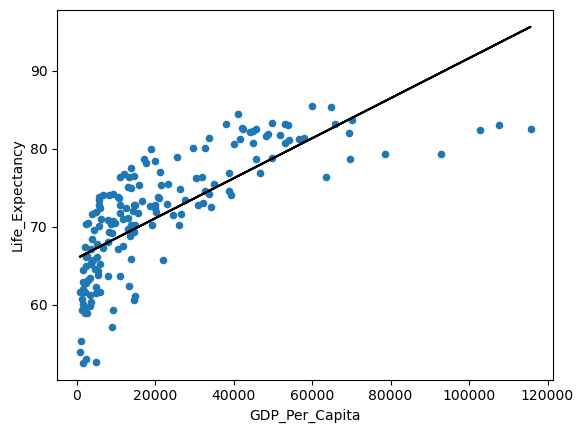

In [210]:
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy")
plt.plot(gdp_le_2021['GDP_Per_Capita'], lr_gdp.fittedvalues, color = 'black');

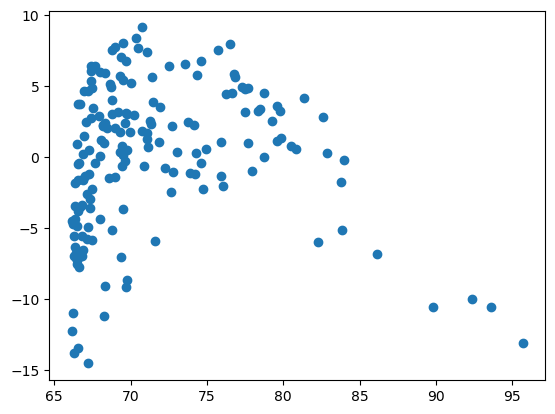

In [180]:
plt.scatter(lr_gdp.fittedvalues, lr_gdp.resid);

#### Q3. Now, fit a model for life expectancy based on the log of gdp per capita.  ##### 
a. Inspect the coefficients for this model. Are they statistically significant  
p-value = 7.78357766276912e-05
#####  b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000  What about for those with a gdp per capita of $100,000? 
50K = 79.4  
100K = 83.3  
#####  c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model  
much better fit and residuals?

In [220]:
lr_log_gdp = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita))", data=gdp_le_2021).fit()
lr_log_gdp.params

Intercept                    18.946970
I(np.log(GDP_Per_Capita))     5.589014
dtype: float64

In [226]:
18.946970 + np.log(50000)*5.589014

79.41886230846505

In [228]:
18.946970 + np.log(100000)*5.589014

83.29287160467513

In [222]:
sms.jarque_bera(lr_log_gdp.resid)

(18.92181875730786,
 7.78357766276912e-05,
 -0.7245333956594466,
 3.724705203405058)

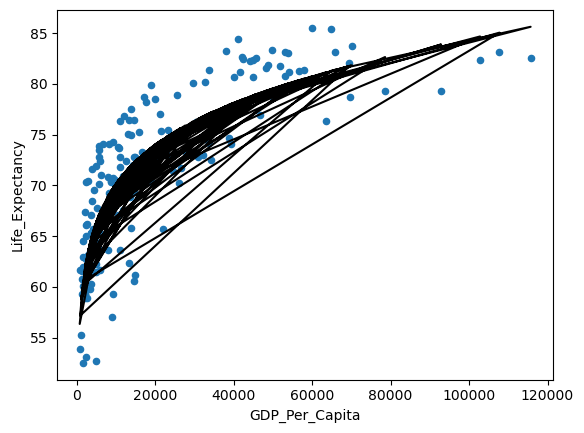

In [200]:
#wtf?
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy")
plt.plot(gdp_le_2021['GDP_Per_Capita'], lr_log_gdp.fittedvalues, color = 'black');

In [206]:
le_pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)

le_pred_df['mean_estimate'] = lr_log_gdp.predict(le_pred_df)

le_pred_df.head(5)

,GDP_Per_Capita,mean_estimate
0,714.066712,55.672248
1,3060.381549,63.806043
2,5406.696386,66.986744
3,7753.011222,69.001265
4,10099.326059,70.478930


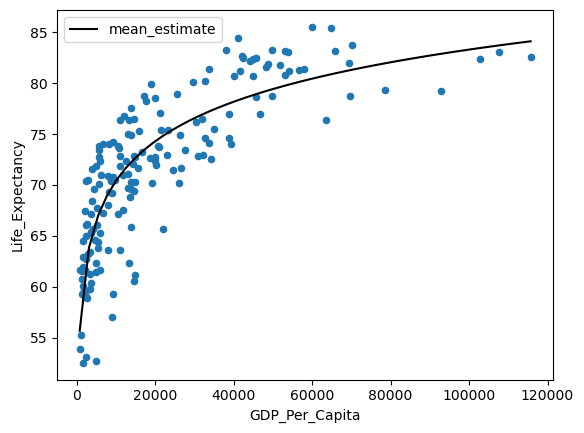

In [214]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
le_pred_df.plot(kind="line", x="GDP_Per_Capita", y="mean_estimate", color="black", ax=ax);

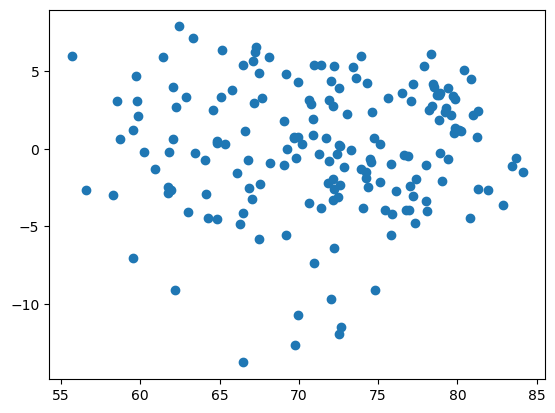

In [216]:
plt.scatter(lr_log_gdp.fittedvalues, lr_log_gdp.resid);

In [230]:
lr_log_gdp.rsquared

0.7166891962983926

#### Q4. Finally, return to the full dataset.  
##### a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.  
##### b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [236]:
lr_log_total_gdp = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita))", data=gdp_le).fit()
lr_log_total_gdp.params

Intercept                    9.194102
I(np.log(GDP_Per_Capita))    6.531130
dtype: float64

In [244]:
lr_log_gdp_year = smf.ols("Life_Expectancy ~ I(np.log(GDP_Per_Capita)) + I(Year-1990)", data=gdp_le).fit()
lr_log_gdp_year.params

Intercept                    8.561151
I(np.log(GDP_Per_Capita))    6.359936
I(Year - 1990)               0.134487
dtype: float64